In [17]:
import numpy as np

N = 2002
A = 10
B = 9

np.random.seed(42)

data = np.random.normal(A, B, N)

data[:10]

array([14.47042738,  8.75562129, 15.82919684, 23.70726871,  7.89261963,
        7.89276739, 24.21291534, 16.90691256,  5.77473053, 14.88304039])

In [18]:
xmin = np.min(data)
xmax = np.max(data)
R = xmax - xmin

xmax, xmin, R

(44.67458341589249, -19.171406060621653, 63.84598947651415)

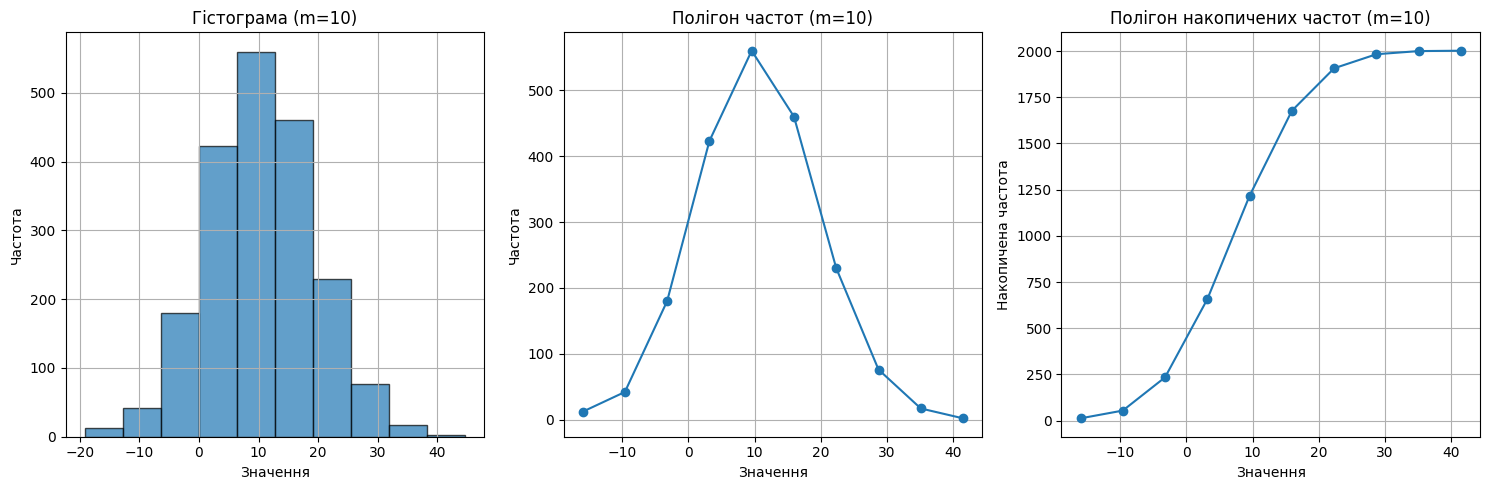

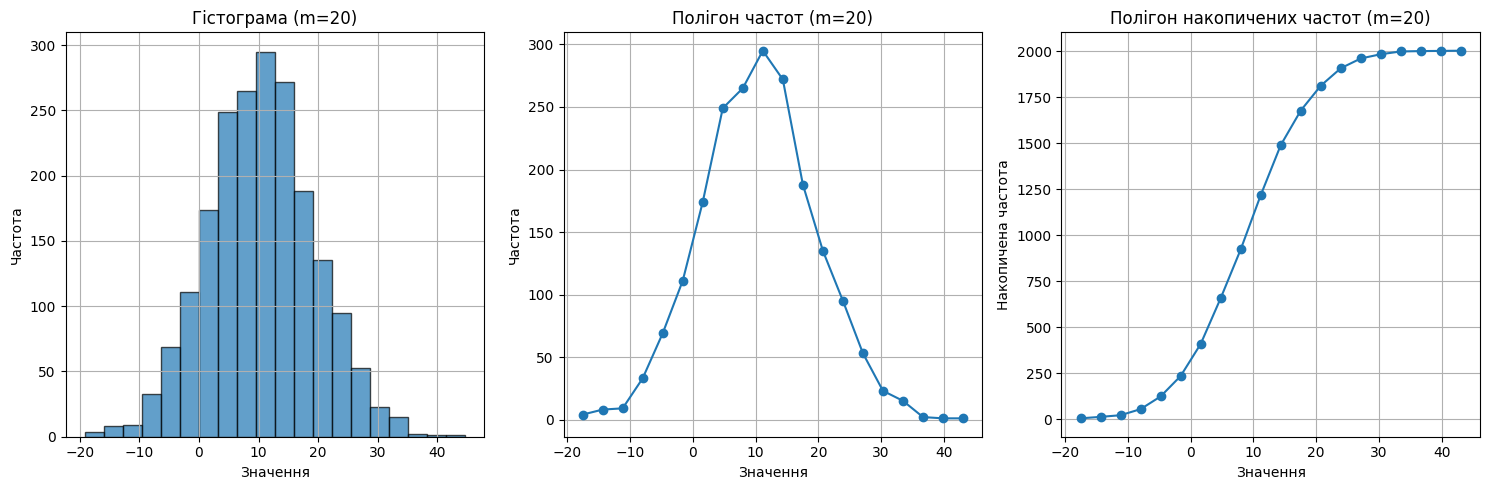

In [19]:
import matplotlib.pyplot as plt


def plot_distributions(sample, bins, title):
    plt.figure(figsize=(15, 5))

    # Гістограма
    plt.subplot(1, 3, 1)
    plt.hist(sample, bins=bins, edgecolor="black", alpha=0.7)
    plt.title(f"Гістограма ({title})")
    plt.xlabel("Значення")
    plt.ylabel("Частота")
    plt.grid(True)

    # Полігон частот
    plt.subplot(1, 3, 2)
    n, bin_edges = np.histogram(sample, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, n, marker="o")
    plt.title(f"Полігон частот ({title})")
    plt.xlabel("Значення")
    plt.ylabel("Частота")
    plt.grid(True)

    # Полігон накопичених частот
    plt.subplot(1, 3, 3)
    n_cumulative = np.cumsum(n)
    plt.plot(bin_centers, n_cumulative, marker="o")
    plt.title(f"Полігон накопичених частот ({title})")
    plt.xlabel("Значення")
    plt.ylabel("Накопичена частота")
    plt.tight_layout()
    plt.grid(True)

    plt.show()


# Plot distributions for m=10 and m=20
plot_distributions(data, bins=10, title="m=10")
plot_distributions(data, bins=20, title="m=20")

In [20]:
import scipy.stats as stats

mean = np.mean(data)
variance = np.var(data)
std_dev = np.std(data)
kurtosis = stats.kurtosis(data)
skewness = stats.skew(data)

mean, variance, std_dev, R, kurtosis, skewness

(10.401667015550514,
 79.04604546290265,
 8.890784299649983,
 63.84598947651415,
 0.05282955089341712,
 0.03403989765159414)

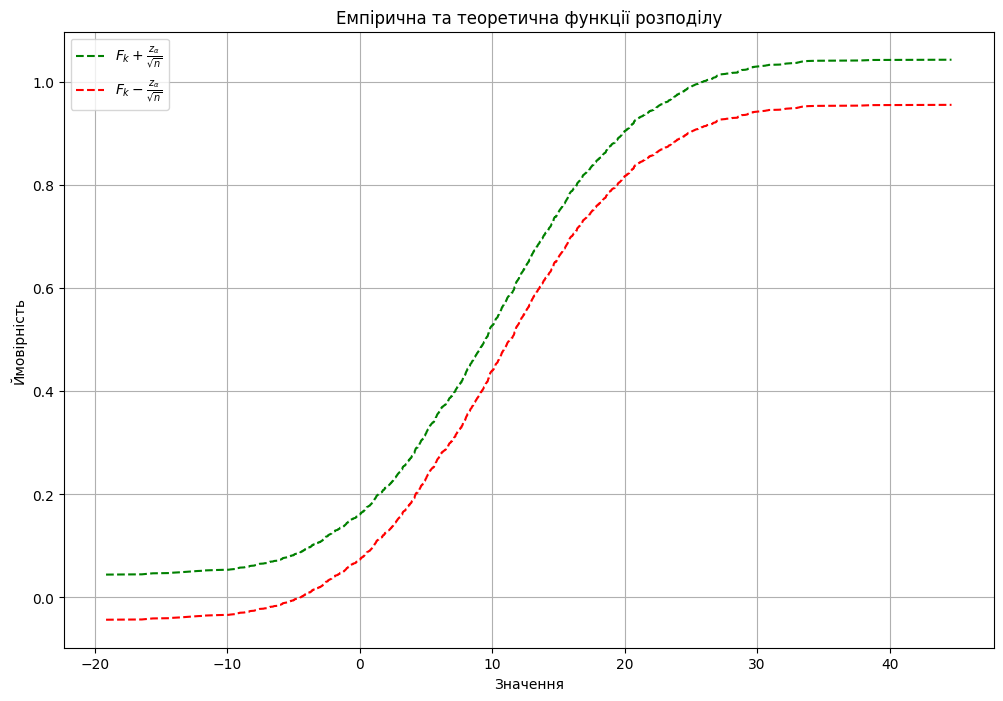

In [21]:
import scipy.stats as stats

alpha = 0.05  # 100%-95% confidence level

data = np.sort(data)

edf = np.arange(1, N + 1) / N

z_critical = stats.norm.ppf(1 - alpha / 2)

delta_z = z_critical / np.sqrt(N)
lower_bound = edf - delta_z
upper_bound = edf + delta_z


plt.figure(figsize=(12, 8))
plt.plot(data, upper_bound, label="$F_k + \\frac{z_\\alpha}{\\sqrt{n}}$", linestyle="--", color="green")
plt.plot(data, lower_bound, label="$F_k - \\frac{z_\\alpha}{\\sqrt{n}}$", linestyle="--", color="red")
plt.xlabel("Значення")
plt.ylabel("Ймовірність")
plt.title("Емпірична та теоретична функції розподілу")
plt.legend()
plt.grid(True)
plt.show()